In [1]:
import yfinance as yf
import pandas as pd

eth = yf.download('ETH-USD', start='2020-01-01', end=None, interval='1d')
eth = eth[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
eth.index.name = 'Date'

eth['Market Cap'] = eth['Close'] * eth['Volume']

data_source = "Yahoo Finance"
date_range = f"{eth.index.min().date()} to {eth.index.max().date()}"

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


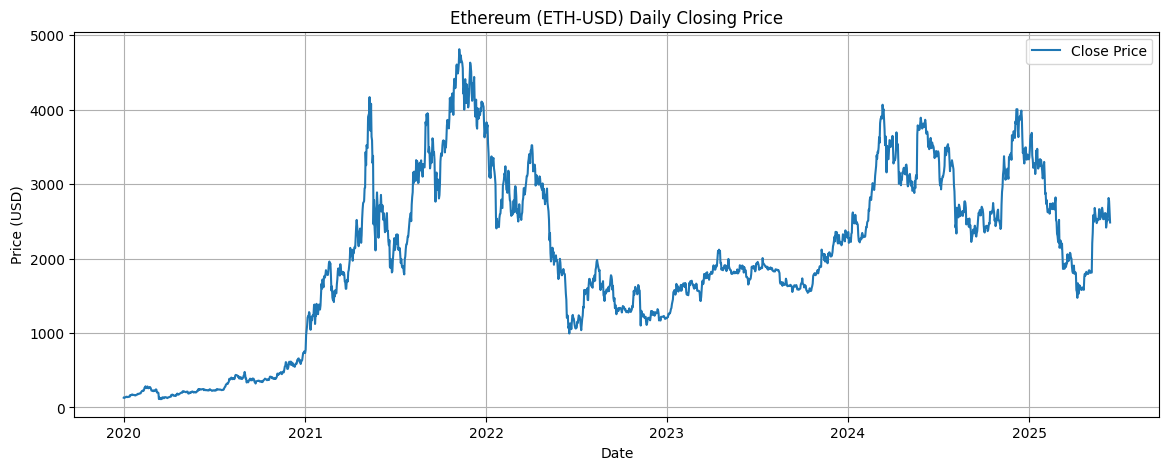

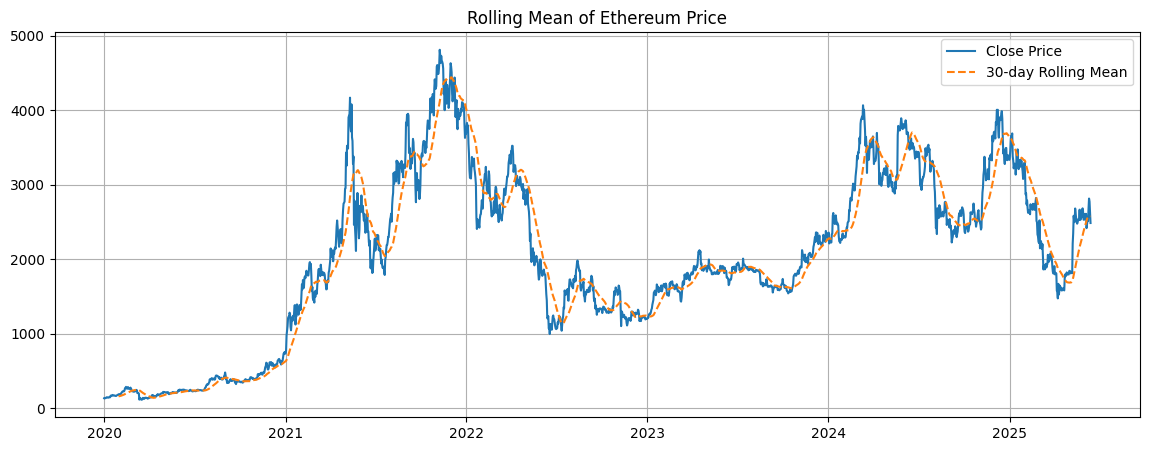

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
plt.plot(eth['Close'], label='Close Price')
plt.title('Ethereum (ETH-USD) Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

eth['Rolling Mean'] = eth['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 5))
plt.plot(eth['Close'], label='Close Price')
plt.plot(eth['Rolling Mean'], label='30-day Rolling Mean', linestyle='--')
plt.title('Rolling Mean of Ethereum Price')
plt.legend()
plt.grid(True)
plt.show()

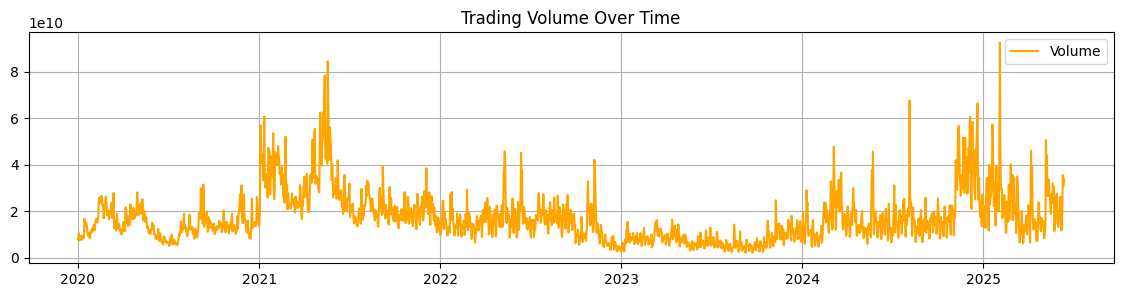

Price          Open         High          Low        Close        Volume  \
Ticker      ETH-USD      ETH-USD      ETH-USD      ETH-USD       ETH-USD   
count   1990.000000  1990.000000  1990.000000  1990.000000  1.990000e+03   
mean    2017.789245  2072.198252  1958.288055  2018.854037  1.714069e+10   
std     1119.585870  1149.743062  1084.832719  1118.540816  1.071704e+10   
min      110.406784   116.021622    95.184303   110.605873  2.081626e+09   
25%     1314.400940  1341.879395  1274.519714  1315.114777  9.856583e+09   
50%     1896.673462  1938.031738  1862.642029  1898.212219  1.498759e+10   
75%     2877.160461  2950.820862  2761.315247  2876.421753  2.127348e+10   
max     4810.071289  4891.704590  4718.039062  4812.087402  9.245355e+10   

Price     Market Cap Rolling Mean  
Ticker                             
count   1.990000e+03  1961.000000  
mean    3.796069e+13  2028.499354  
std     3.739245e+13  1094.884452  
min     1.003688e+12   136.959600  
25%     9.406269e+12  1

In [3]:
plt.figure(figsize=(14, 3))
plt.plot(eth['Volume'], color='orange', label='Volume')
plt.title('Trading Volume Over Time')
plt.grid(True)
plt.legend()
plt.show()

print(eth.describe())

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(eth['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

eth['Close_diff'] = eth['Close'].diff().dropna()

result_diff = adfuller(eth['Close_diff'].dropna())
print(f"Differenced ADF Statistic: {result_diff[0]}")
print(f"Differenced p-value: {result_diff[1]}")

ADF Statistic: -2.2453315718118154
p-value: 0.19020579805702437
Differenced ADF Statistic: -17.591825362553088
Differenced p-value: 3.960458346823504e-30


<Figure size 1200x400 with 0 Axes>

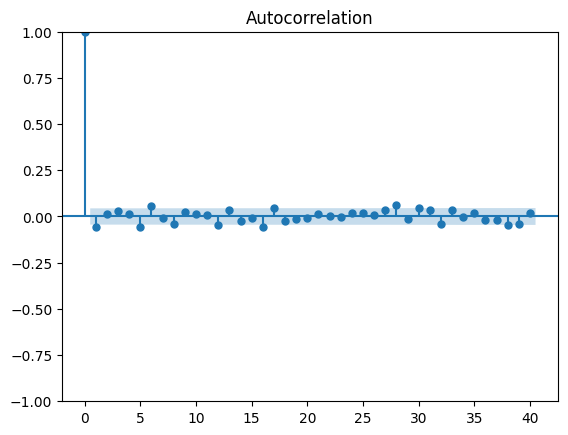

<Figure size 1200x400 with 0 Axes>

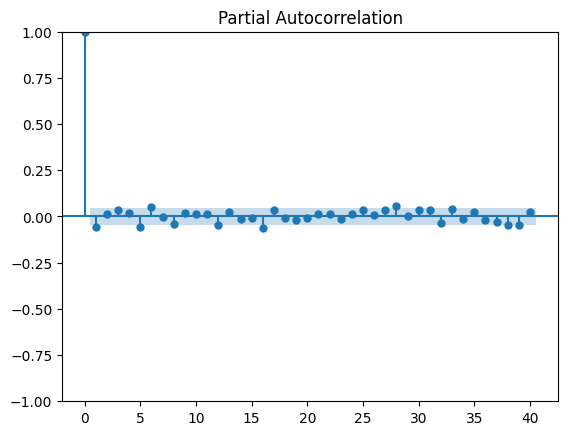

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plot_acf(eth['Close_diff'].dropna(), lags=40)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(eth['Close_diff'].dropna(), lags=40)
plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(eth['Close'], order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                 1990
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11843.327
Date:                Fri, 13 Jun 2025   AIC                          23696.653
Time:                        01:50:25   BIC                          23724.630
Sample:                             0   HQIC                         23706.929
                               - 1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2597      0.007    -36.337      0.000      -0.274      -0.246
ar.L2         -0.9642      0.008   -120.480      0.000      -0.980      -0.949
ma.L1          0.2408      0.005     44.383      0.0

In [7]:
eth['Predicted'] = model_fit.predict(start=eth.index[1], end=eth.index[-1])

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(eth['Close'][1:], eth['Predicted'][1:]))
mape = mean_absolute_percentage_error(eth['Close'][1:], eth['Predicted'][1:])
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 93.24050791497113
MAPE: 0.029841658347150583


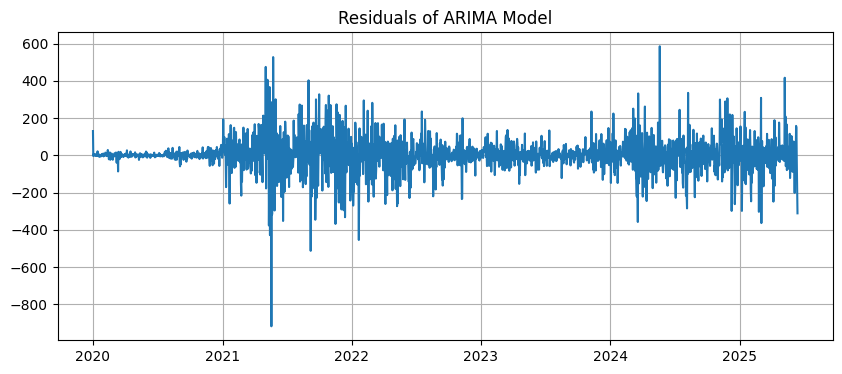

In [8]:
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


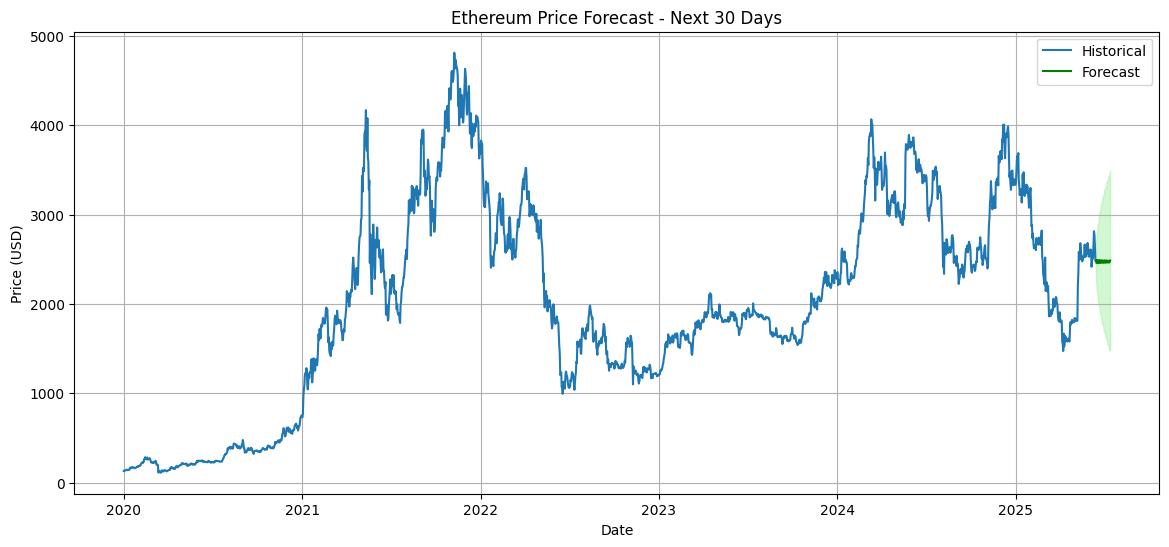

In [9]:
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

future_dates = pd.date_range(eth.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_mean.index = future_dates
forecast_ci.index = future_dates

# Plot
plt.figure(figsize=(14, 6))
plt.plot(eth['Close'], label='Historical')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.4)
plt.title('Ethereum Price Forecast - Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
forecast_table = pd.DataFrame({
    'Date': forecast_mean.index,
    'Forecasted Price (USD)': forecast_mean,
    'Lower CI': forecast_ci.iloc[:, 0],
    'Upper CI': forecast_ci.iloc[:, 1]
})

forecast_table = forecast_table.round(2)
print(forecast_table.head(10))

                 Date  Forecasted Price (USD)  Lower CI  Upper CI
2025-06-14 2025-06-14                 2490.14   2306.85   2673.43
2025-06-15 2025-06-15                 2459.29   2202.52   2716.06
2025-06-16 2025-06-16                 2462.29   2145.57   2779.01
2025-06-17 2025-06-17                 2491.26   2123.30   2859.22
2025-06-18 2025-06-18                 2480.84   2070.59   2891.10
2025-06-19 2025-06-19                 2455.62   2007.16   2904.08
2025-06-20 2025-06-20                 2472.21   1986.37   2958.05
2025-06-21 2025-06-21                 2492.23   1972.12   3012.33
2025-06-22 2025-06-22                 2471.03   1920.51   3021.55
2025-06-23 2025-06-23                 2457.23   1877.11   3037.36
